In [17]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'test measurements (1 to 100)')

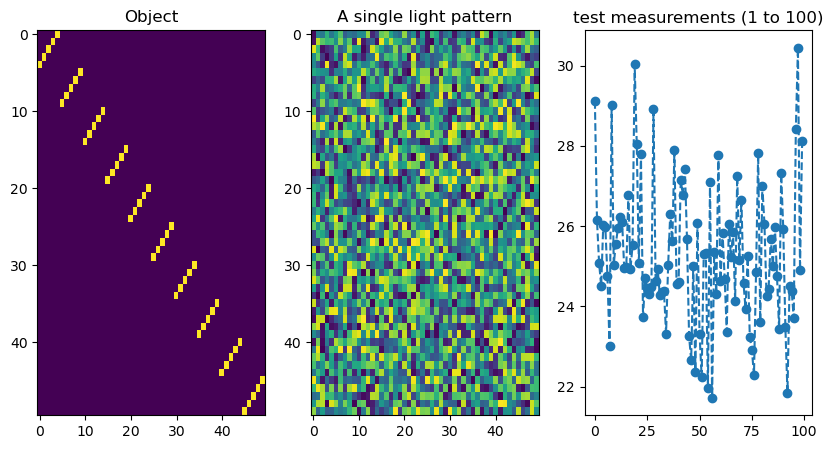

In [ ]:
# 1. create the object
obj = np.identity(10); obj = np.kron(obj, np.fliplr(np.identity(5)))
# 2. create the refes
N = 5000 # number of realizations 
ref = np.random.random([obj.shape[0],obj.shape[1],N])
# 3. create the tests
test = (ref*obj[:,:,np.newaxis]).sum(axis=(0,1))
# 4. reconstruct the object

fig, ax = plt.subplots(1,3,figsize = [10,5])
ax[0].imshow(obj, aspect='auto'); ax[0].set_title('Object')
ax[1].imshow(ref[:,:,0], aspect='auto'); ax[1].set_title('A single light pattern')
ax[2].plot(test[:100], '--o',); ax[2].set_title('test measurements (1 to 100)')


Text(0.5, 1.0, 'rec')

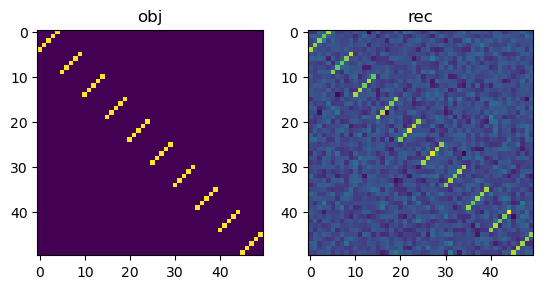

In [19]:
# GI reconstruction
rec = np.mean(ref*test,axis=2) - np.mean(ref,axis=2)*np.mean(test)
plt.figure()
plt.subplot(121); plt.imshow(obj); plt.title('obj')
plt.subplot(122); plt.imshow(rec); plt.title('rec')

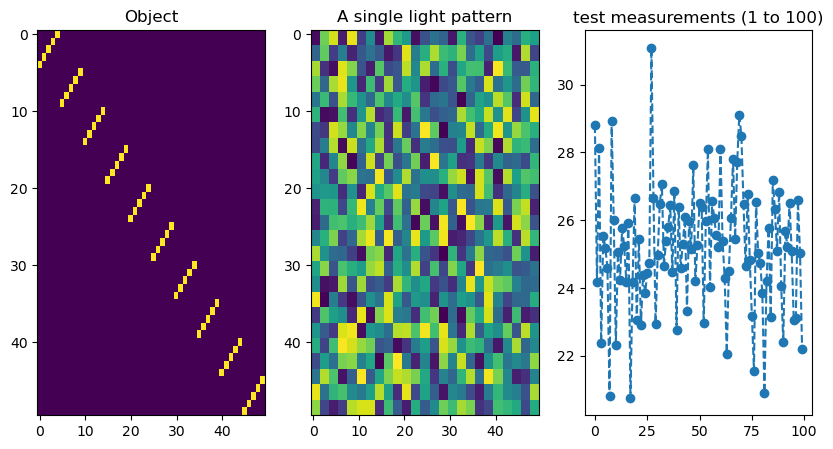

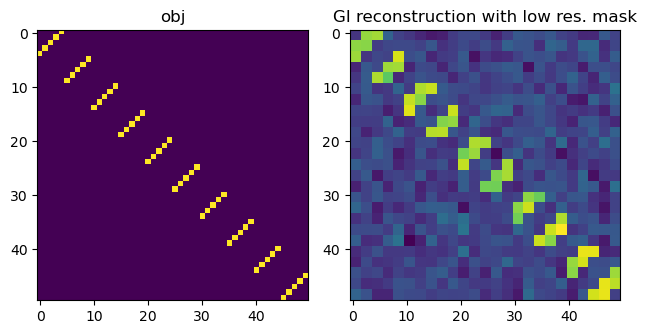

In [30]:
# GI with larger features in ref
N = 5000 # number of realizations 
scaling_fac = 2
nx, ny = obj.shape
low_res_ref = np.random.random([int(nx/scaling_fac),int(ny/scaling_fac),N])
ref = np.kron(low_res_ref,np.ones([scaling_fac,scaling_fac,1]))

test = (ref*obj[:,:,np.newaxis]).sum(axis=(0,1))

fig, ax = plt.subplots(1,3,figsize = [10,5])
ax[0].imshow(obj, aspect='auto'); ax[0].set_title('Object')
ax[1].imshow(ref[:,:,0], aspect='auto'); ax[1].set_title('A single light pattern')
ax[2].plot(test[:100], '--o',); ax[2].set_title('test measurements (1 to 100)')
plt.show()

rec = np.mean(ref*test,axis=2) - np.mean(ref,axis=2)*np.mean(test)
plt.figure()
plt.subplot(121); plt.imshow(obj); plt.title('obj')
plt.subplot(122); plt.imshow(rec); plt.title('rec')
plt.title('GI reconstruction with low res. mask')
plt.tight_layout()